In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
train_df = '/Users/riddhidhameliya/Desktop/My Project/Flight-Delay-/Data/Train.csv'
test_df = '/Users/riddhidhameliya/Desktop/My Project/Flight-Delay-/Data/Test.csv'
train_df = pd.read_csv(train_df)
test_df = pd.read_csv(test_df)

In [3]:
train_df.head()

ID       DATOP     FLTID DEPSTN ARRSTN                  STD  \
0  train_id_0  2016-01-03  TU 0712     CMN    TUN  2016-01-03 10:30:00   
1  train_id_1  2016-01-13  TU 0757     MXP    TUN  2016-01-13 15:05:00   
2  train_id_2  2016-01-16  TU 0214     TUN    IST  2016-01-16 04:10:00   
3  train_id_3  2016-01-17  TU 0480     DJE    NTE  2016-01-17 14:10:00   
4  train_id_4  2016-01-17  TU 0338     TUN    ALG  2016-01-17 14:30:00   

                   STA STATUS         AC  target  
0  2016-01-03 12.55.00    ATA  TU 32AIMN   260.0  
1  2016-01-13 16.55.00    ATA  TU 31BIMO    20.0  
2  2016-01-16 06.45.00    ATA  TU 32AIMN     0.0  
3  2016-01-17 17.00.00    ATA  TU 736IOK     0.0  
4  2016-01-17 15.50.00    ATA  TU 320IMU    22.0

In [4]:
test_df.head()

ID       DATOP     FLTID DEPSTN ARRSTN                  STD  \
0  test_id_0  2016-05-04  TU 0700     DJE    TUN  2016-05-04 06:40:00   
1  test_id_1  2016-05-05  TU 0395     TUN    BKO  2016-05-05 15:20:00   
2  test_id_2  2016-05-06  TU 0745     FRA    TUN  2016-05-06 10:00:00   
3  test_id_3  2016-05-11  TU 0848     BEY    TUN  2016-05-11 09:40:00   
4  test_id_4  2016-05-11  TU 0635     ORY    MIR  2016-05-11 09:50:00   

                   STA STATUS         AC  
0  2016-05-04 07.30.00    ATA  TU 32AIMF  
1  2016-05-05 20.05.00    ATA  TU 320IMW  
2  2016-05-06 12.25.00    ATA  TU 32AIMC  
3  2016-05-11 13.10.00    ATA  TU 31BIMO  
4  2016-05-11 12.35.00    ATA  TU 736IOQ

# Data cleaning

In [5]:
# Let’s observe the shape of our datasets.
print('train data shape :', train_df.shape)
print('test data shape :', test_df.shape)

train data shape : (107833, 10)
test data shape : (9333, 9)


In [6]:
# Understand data type and info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      9333 non-null   object
 1   DATOP   9333 non-null   object
 2   FLTID   9333 non-null   object
 3   DEPSTN  9333 non-null   object
 4   ARRSTN  9333 non-null   object
 5   STD     9333 non-null   object
 6   STA     9333 non-null   object
 7   STATUS  9333 non-null   object
 8   AC      9333 non-null   object
dtypes: object(9)
memory usage: 656.4+ KB


In [73]:
#check for no of unique columns

for name in train_df.columns:
    unique_values = train_df[name].nunique()
    print(f"Feature '{name}' has '{unique_values}' unique values")




Feature 'ID' has '107833' unique values
Feature 'DATOP' has '1011' unique values
Feature 'FLTID' has '1861' unique values
Feature 'DEPSTN' has '132' unique values
Feature 'ARRSTN' has '128' unique values
Feature 'STD' has '81697' unique values
Feature 'STA' has '85136' unique values
Feature 'STATUS' has '5' unique values
Feature 'AC' has '68' unique values
Feature 'target' has '968' unique values
Feature 'duration' has '764' unique values
Feature 'day_of_week' has '7' unique values
Feature 'month_of_year' has '12' unique values
Feature 'year' has '3' unique values
Feature 'std_hr' has '24' unique values
Feature 'sta_hr' has '24' unique values


In [75]:
common_columns = train_df.columns.intersection(test_df.columns)

for name in common_columns:
    unique_values = test_df[name].nunique()
    print(f"Feature '{name}' has '{unique_values}' unique values")


Feature 'ID' has '9333' unique values
Feature 'DATOP' has '86' unique values
Feature 'FLTID' has '700' unique values
Feature 'DEPSTN' has '82' unique values
Feature 'ARRSTN' has '84' unique values
Feature 'STD' has '7012' unique values
Feature 'STA' has '7290' unique values
Feature 'STATUS' has '5' unique values
Feature 'AC' has '44' unique values
Feature 'day_of_week' has '7' unique values
Feature 'month_of_year' has '3' unique values
Feature 'year' has '3' unique values
Feature 'std_hr' has '24' unique values
Feature 'sta_hr' has '24' unique values


#### Data type seems not good so let's correct it.


#### Correct train data type 

In [8]:
# Convert 'DATOP' to datetime
train_df['DATOP'] = pd.to_datetime(train_df['DATOP'])

# Convert 'FLTID' and 'ARRSTN' to category
train_df['FLTID'] = train_df['FLTID'].astype('category')
train_df['ARRSTN'] = train_df['ARRSTN'].astype('category')

# Convert 'STD' and 'STA' to datetime
train_df['STD'] = pd.to_datetime(train_df['STD'])
train_df['STA'] = pd.to_datetime(train_df['STA'].str.replace('.', ':'))  # Replacing '.' with ':' before conversion

# Convert 'STATUS' to category
train_df['STATUS'] = train_df['STATUS'].astype('category')


# Convert 'AC' to category
train_df['AC'] = train_df['AC'].astype('category')

#### Correct test data type

In [9]:
# Convert 'DATOP' to datetime
test_df['DATOP'] = pd.to_datetime(test_df['DATOP'])

# Convert 'FLTID' and 'ARRSTN' to category
test_df['FLTID'] = test_df['FLTID'].astype('category')
test_df['ARRSTN'] = test_df['ARRSTN'].astype('category')

# Convert 'STD' and 'STA' to datetime
test_df['STD'] = pd.to_datetime(test_df['STD'])
test_df['STA'] = pd.to_datetime(test_df['STA'].str.replace('.', ':'))  # Replacing '.' with ':' before conversion

# Convert 'STATUS' to category
test_df['STATUS'] = test_df['STATUS'].astype('category')

# Convert 'AC' to category
test_df['AC'] = test_df['AC'].astype('category')

In [10]:
# Create new column 'duration' in train DataFrame
train_df['duration'] = (train_df['STA'] - train_df['STD']).dt.total_seconds() / 60

# Create new column 'duration' in test DataFrame
test_df['duration'] = (test_df['STA'] - test_df['STD']).dt.total_seconds() / 60


In [12]:
# Splitting DATOP into month, day, year
train_df['day_of_week'] = train_df['DATOP'].dt.dayofweek
train_df['month_of_year'] = train_df['DATOP'].dt.month
train_df['year'] = train_df['DATOP'].dt.year

# Splitting STD into hours
train_df['std_hr'] = train_df['STD'].dt.hour

# Splitting STA into hours
train_df['sta_hr'] = train_df['STA'].dt.hour

In [13]:
# Splitting DATOP into month, day, year
test_df['day_of_week'] = test_df['DATOP'].dt.dayofweek
test_df['month_of_year'] = test_df['DATOP'].dt.month
test_df['year'] = test_df['DATOP'].dt.year

# Splitting STD into hours 
test_df['std_hr'] = test_df['STD'].dt.hour

# Splitting STA into hours
test_df['sta_hr'] = test_df['STA'].dt.hour

In [14]:
train_df

ID      DATOP      FLTID DEPSTN ARRSTN  \
0            train_id_0 2016-01-03   TU 0712     CMN    TUN   
1            train_id_1 2016-01-13   TU 0757     MXP    TUN   
2            train_id_2 2016-01-16   TU 0214     TUN    IST   
3            train_id_3 2016-01-17   TU 0480     DJE    NTE   
4            train_id_4 2016-01-17   TU 0338     TUN    ALG   
...                 ...        ...        ...    ...    ...   
107828  train_id_107828 2018-07-05  WKL 0000     TUN    TUN   
107829  train_id_107829 2018-01-13   UG 0003     DJE    TUN   
107830  train_id_107830 2018-11-07  SGT 0000     TUN    TUN   
107831  train_id_107831 2018-01-23   UG 0010     TUN    DJE   
107832  train_id_107832 2018-11-13   UG 0002     TUN    DJE   

                       STD                 STA STATUS         AC  target  \
0      2016-01-03 10:30:00 2016-01-03 12:55:00    ATA  TU 32AIMN   260.0   
1      2016-01-13 15:05:00 2016-01-13 16:55:00    ATA  TU 31BIMO    20.0   
2      2016-01-16 04:10:00 2016-01-16 06:45:00    ATA  TU 32AIMN     0.0   
3      2016-01-17 14:10:00 2016-01-17 17:00:00    ATA  TU 736IOK     0.0   
4      2016-01-17 14:30:00 2016-01-17 15:50:00    ATA  TU 320IMU    22.0   
...                    ...                 ...    ...        ...     ...   
107828 2018-07-05 23:00:00 2018-07-06 02:00:00    SCH  TU 32AIML     0.0   
107829 2018-01-13 08:00:00 2018-01-13 09:00:00    SCH  UG AT7AT7     0.0   
107830 2018-11-07 05:00:00 2018-11-07 12:50:00    SCH  TU 736IOK     0.0   
107831 2018-01-23 18:00:00 2018-01-23 18:45:00    ATA  TU CR9ISA     0.0   
107832 2018-11-13 06:15:00 2018-11-13 07:05:00    SCH  TU CR9ISA     0.0   

        duration  day_of_week  month_of_year  year  std_hr  sta_hr  
0          145.0            6              1  2016      10      12  
1          110.0            2              1  2016      15      16  
2          155.0            5              1  2016       4       6  
3          170.0            6              1  2016      14      17  
4           80.0            6              1  2016      14      15  
...          ...          ...            ...   ...     ...     ...  
107828     180.0            3              7  2018      23       2  
107829      60.0            5              1  2018       8       9  
107830     470.0            2             11  2018       5      12  
107831      45.0            1              1  2018      18      18  
107832      50.0            1             11  2018       6       7  

[107833 rows x 16 columns]

# EDA

In [18]:
import plotly.express as px
# Scatter plot to explore the relationship between duration and target
fig = px.scatter(train_df, x='duration', y='target', trendline="ols", title="Scatter plot: Duration vs Target")
fig.show()

In [28]:
import plotly.express as px

# Count the number of flights for each day of the week
flight_count_per_day = train_df['day_of_week'].value_counts().sort_index()

# Print the counts
print(flight_count_per_day)

# Create a bar plot to visualize the count of flights per day of the week
fig = px.bar(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
             y=flight_count_per_day,
             title="Bar plot: Count of Flights per Day of the Week",
             labels={'x': 'Day of the Week', 'y': 'Flight Count'})

fig.show()


day_of_week
0    15945
1    13183
2    13078
3    15422
4    16340
5    17177
6    16688
Name: count, dtype: int64


In [31]:
import plotly.express as px

# Create a DataFrame for flights with delay duration 0
zero_delay_df = train_df[train_df['target'] == 0]

# Create a DataFrame for flights with non-zero delay duration
non_zero_delay_df = train_df[train_df['target'] != 0]

# Create a bar plot for flights with delay duration 0
zero_delay_fig = px.bar(zero_delay_df['STATUS'].value_counts(), 
                        labels={'value': 'Count', 'index': 'Flight Status'},
                        title='Number of Flights with Delay Duration 0 for Each Flight Status')
zero_delay_fig.show()

# Create a bar plot for flights with non-zero delay duration
non_zero_delay_fig = px.bar(non_zero_delay_df['STATUS'].value_counts(), 
                            labels={'value': 'Count', 'index': 'Flight Status'},
                            title='Number of Flights with Non-Zero Delay Duration for Each Flight Status')
non_zero_delay_fig.show()


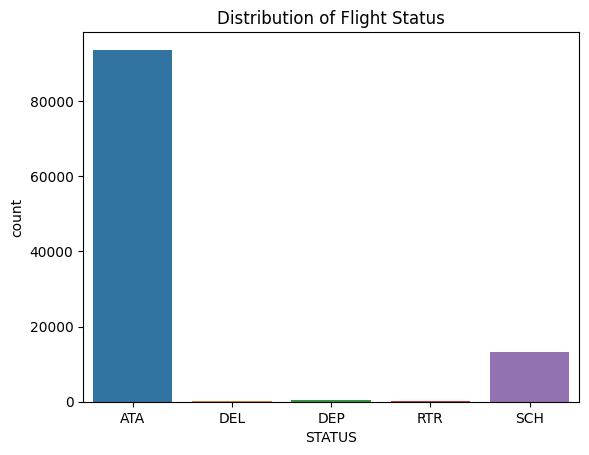

In [32]:
sns.countplot(x='STATUS', data=train_df)
plt.title('Distribution of Flight Status')
plt.show()


<Axes: xlabel='target'>

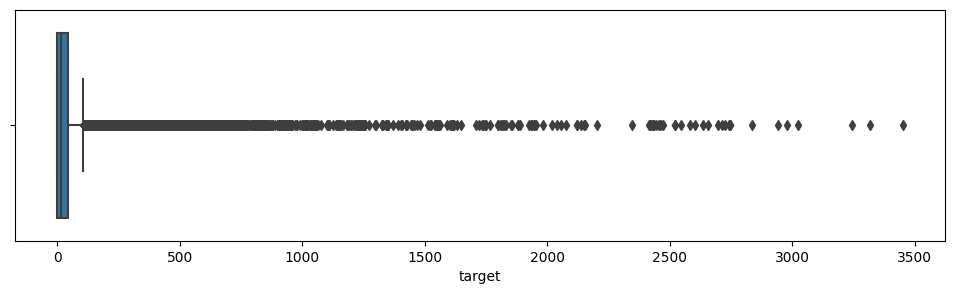

In [33]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x='target', data=train_df)